In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import itertools
from random import randint

In [2]:
# Disable plot axes by default
import matplotlib as mpl
if True:
    mpl.rc('axes.spines', top=False, bottom=False, left=False, right=False)
    mpl.rc('xtick', top=False, bottom=False, labelsize=0)
    mpl.rc('ytick', left=False, right=False, labelsize=0)

In [3]:
from IPython.display import Image, HTML

def pydot_image(graph, prog='dot', width=None):
    dot = nx.nx_pydot.to_pydot(graph)
    if width:
        return Image(dot.create_png(prog=prog), width=width)
    else:
        return HTML(dot.create_svg(prog=prog).decode())

# De Bruijn cycles

If we want to crack such a 4-digit PIN code, the brute-force way would be to
try all the different combinations (from 0000 to 9999) one by one.
This results in a total of 40000 digits to type.
A clever way is to produce a list of digits, such that if entered sequentially,
would cover all the possible codes in the minimal amount of digits.

- [De Bruijn sequences with NetworkX](https://www.jtp.io/2016/11/14/de-bruijn-sequences-networkx.html)
- [A video course by SpbAU RAN](https://stepik.org/lesson/11770/step/2)

## Eulerian Flavor

In [4]:
def debruijn_eulerian_graph(n, k):
    assert n in (2, 10, 16)
    fmt = '{:%s}' % {2:'b', 10:'d', 16:'x'}[n]
    graph = nx.DiGraph()
    for i in range(n**k):
        string = fmt.format(i).rjust(k,'0')
        graph.add_edge(string[:-1], string[1:], label=string)
    return graph

def debruijn_eulerian_sequence(graph):
    return ''.join(edge[1][-1] for edge in nx.eulerian_circuit(graph))

In [5]:
graph_eb3 = debruijn_eulerian_graph(n=2, k=3)
print(debruijn_eulerian_sequence(graph_eb3))

11101000


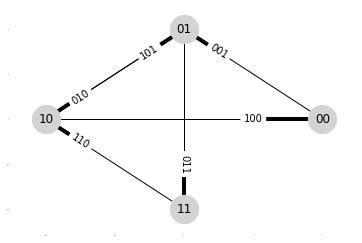

In [6]:
layout = nx.circular_layout(graph_eb3)
edge_labels = {(a,b): d['label'] for a,b,d in graph_eb3.edges.data()}
_ = nx.draw_networkx(graph_eb3, pos=layout, node_color='lightgray', node_size=800)
_ = nx.draw_networkx_edge_labels(graph_eb3, pos=layout, edge_labels=edge_labels, label_pos=0.25)

In [7]:
pydot_image(graph_eb3, 'circo')

In [8]:
graph_eb4 = debruijn_eulerian_graph(n=2, k=4)
seq_eb4 = debruijn_eulerian_sequence(graph_eb4)
print(seq_eb4)

1111010110010000


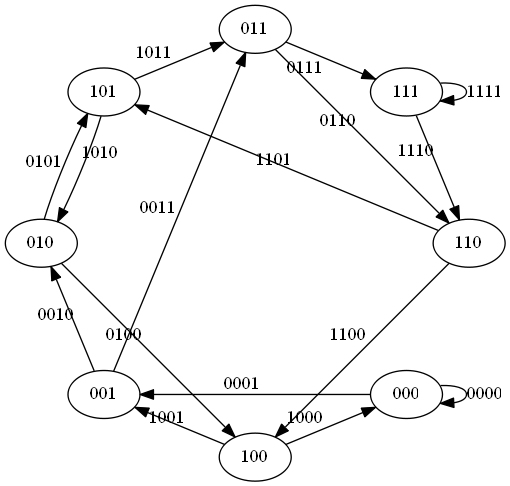

In [9]:
pydot_image(graph_eb4, 'circo', width=400)

# Задача

Имеются две последовательности де Брейна $B(2,3)$,
а именно, бинарные циклические последовательности

$$ 00010111 \; и \; 11101000 $$

в каждой из которых любой возможный $3$-мер встречается ровно один раз
в виде подпоследовательности  $a_{i} a_{i+1} a_{i+2}$.

Доказать, что не существует бинарной циклической последовательности,
состоящей из восьми символов, которая бы ровно один раз
содержала любой из восьми возможных тримеров в качестве
подпоследовательности вида    $a_{i} a_{i+1} a_{i+2}$.

### Решение

Подберём такую последовательность тримеров, что в итоге придём к противоречию. По мере заполнения цикла **новые** символы я буду выделять жирным. Уже определившиеся символы в нашем 8-символьном цикле я буду обозначать как 0 и 1, а ещё неопределённые - буквой "х".

1) Цикл должен содержать тример **000** в виде подпоследовательности **00**x**0**. Тогда цикл должен иметь вид "**00**x**0**xxxx" (или что-то, полученное циклическим сдвигом из этого, но без ограничения общности запишу в таком виде).

2) Цикл должен содержать **111** в виде подпоследовательности **11**х**1**. В цикл "00х0хххх" её можно пропихнуть только в конец (с 4-й позиции), иначе она пересечётся с уже зафиксированными нулями. Получаем, что цикл должен иметь вид "00х0**11**х**1**" (или опять-таки что-то полученное из этого циклическим сдвигом).

3) Пропихнем в цикл тример **110** в виде подпоследовательности **11**х**0**. Единственный вариант для него - в позицию 5: "**0**0х01**11**1".

4) Теперь пропихнем **101**, в виде подпоследовательности **10**х**1**. Единственный вариант: "**0**0**1**0111**1**".

5) Теперь видно, что **001** (в виде **00**х**1**) пропихнуть в "00101111" уже никак нельзя. Первые два нуля диктуют впихивать с начальной позиции, но на 4-й позиции уже мешает "0". Значит, искомой последовательности не существует.

## Проверка домашки

In [10]:
def check_debruijn_sequence(n, k, seq):
    assert n in (2, 10, 16)
    doubled = seq + seq
    fmt = '{:%s}' % {2:'b', 10:'d', 16:'x'}[n]
    flag = all(fmt.format(i).rjust(k,'0') in doubled for i in range(n**k))
    print('"%s" is %s' % (seq, 'OK' if flag else 'FAIL'))

check_debruijn_sequence(n=2, k=4, seq='1111010110010000')
check_debruijn_sequence(n=2, k=4, seq='0000101101001111')
check_debruijn_sequence(n=2, k=4, seq='0000101001111011')
check_debruijn_sequence(n=2, k=4, seq='0010111100001101')

"1111010110010000" is OK
"0000101101001111" is OK
"0000101001111011" is OK
"0010111100001101" is OK


# De Bruijn Sequence for Decimal Alphabet

In [11]:
graph_ed2 = debruijn_eulerian_graph(n=10, k=2)
pydot_image(graph_ed2)

In [12]:
graph_ed3 = debruijn_eulerian_graph(n=10, k=3)
seq_ed3 = debruijn_eulerian_sequence(graph_ed3)
print('Length of DeBruijn sequence for %d decimals: %d' % (3, len(seq_ed3)))
print('Sequence:\n\n%s' % seq_ed3)

Length of DeBruijn sequence for 3 decimals: 1000
Sequence:

9998988899789798788797787779968967969868867869768767769668667666995895795695985885785685975875775675965865765665955855755655599489479469459498488478468458497487477467457496486476466456495485475465455494484474464454449938937936935934939838837836835834839738737736735734739638637636635634639538537536535534539438437436435434439338337336335334333992892792692592492392982882782682582482382972872772672572472372962862762662562462362952852752652552452352942842742642542442342932832732632532432332922822722622522422322299189179169159149139129198188178168158148138128197187177167157147137127196186176166156146136126195185175165155145135125194184174164154144134124193183173163153143133123192182172162152142132122191181171161151141131121119908907906905904903902901909808807806805804803802801809708707706705704703702701709608607606605604603602601609508507506505504503502501509408407406405404403402401409308307306305304303302301309208207206205204203202

In [13]:
graph_ed4 = debruijn_eulerian_graph(n=10, k=4)
seq_ed4 = debruijn_eulerian_sequence(graph_ed4)
print('Length of DeBruijn sequence for %d decimals: %d' % (4, len(seq_ed4)))

Length of DeBruijn sequence for 4 decimals: 10000


## Hamiltonian Flavor

In [7]:
def debruijn_hamiltonian_graph(n, k):
    assert n==2
    fmt = '{:b}'
    g = nx.DiGraph()
    idx = range(2**k)
    s = [fmt.format(i).rjust(k,'0') for i in idx]
    g.add_nodes_from(s)
    for i, j in itertools.product(idx, idx):
        if s[i][1:] == s[j][:-1]:
            g.add_edge(s[i], s[j], label=s[i][-1]+s[j])
    return g

In [11]:
graph_hb2 = debruijn_hamiltonian_graph(n=2, k=2)
pydot_image(graph_hb2, 'circo')

In [12]:
graph_hb3 = debruijn_hamiltonian_graph(n=2, k=3)
pydot_image(graph_hb3, 'circo')

### Notice

The output graph below is too large and notebook may autoscroll it. Use the [auto-scroll notebook extension](http://jupyter-contrib-nbextensions.readthedocs.io/) to fix it.

### Installing jupyter extensions:

1. Before installing, stop all running notebook servers and remove their cache
   (see this [github issue](https://github.com/ipython-contrib/jupyter_contrib_nbextensions/issues/1090)):

```
gwmi win32_process -filter 'name like "%python%"' | %{ $_.terminate() }
rm -r $HOME\AppData\Roaming\jupyter\runtime
```

2. run the anaconda shell and install package

```
conda install -c conda-forge jupyter_contrib_nbextensions
```

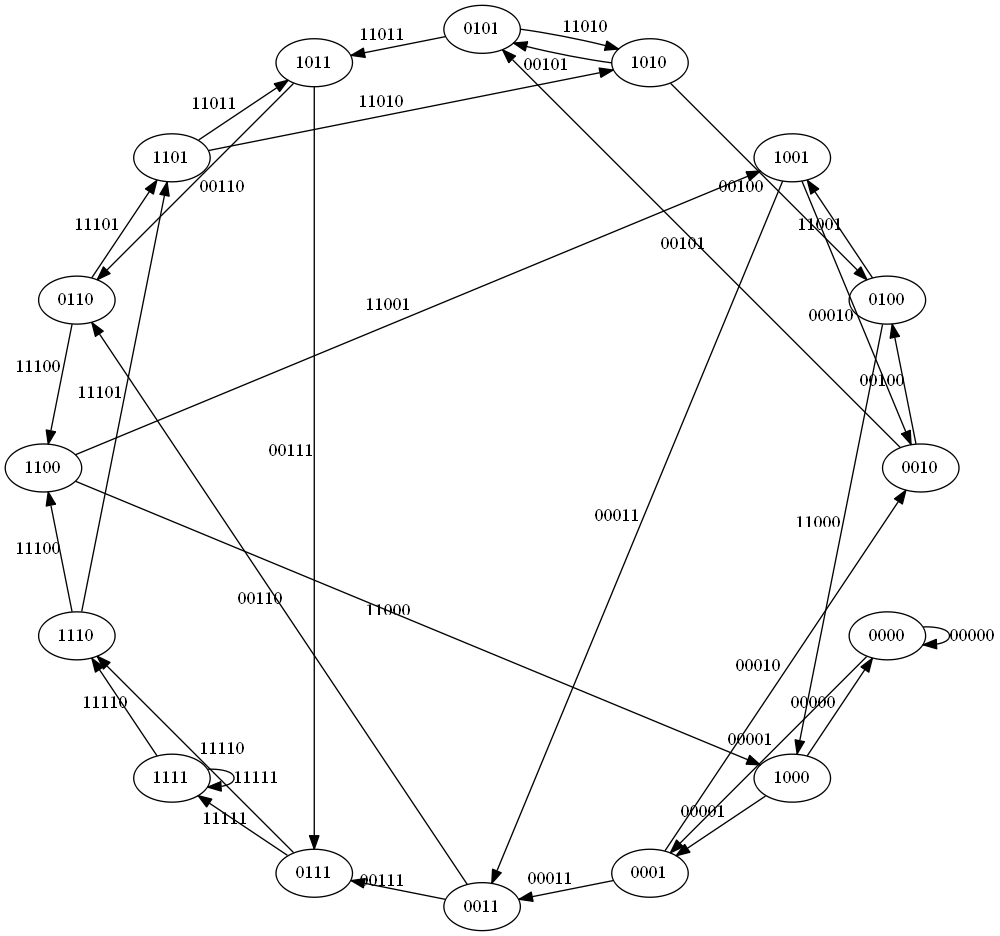

In [17]:
graph_hb4 = debruijn_hamiltonian_graph(n=2, k=4)
pydot_image(graph_hb4, prog='circo', width=500)

# Практический пример

Использование цепи ДеБрёйна для обработки генома: [лекция](https://stepik.org/lesson/11770/step/11).
